## CA2: Static Data Visualization with Python 

#### Student Name: Larissa Justo Evaldt,       Student Number: 2017270

The first thing we need to do to be able to work with the data, to read it and explore it, and be able to make our graphs and visualizations is to load the libraries we will need to use:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Using the pandas library to read the dataset as a pandas DataFrame. Save it to a variable called 'drinks_df'

In [2]:
drinks_df = pd.read_csv("drinks.csv")

Check out the DataFrame below

In [3]:
drinks_df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


### Identify the 5 countries who consume the most alcohol

In order to identify the countries who consume the most alcohol, I decided to go with selecting the 5 countries who consume most total litres of pure alcohol. Since the type of drink servings (beer, wine and spirit) each will have a different percentage of alcohol, I feel it's unlogical to add them together and use the servings, because if a country has a lot of beer servings for example, it may end up at the top of the list but still It may not be the one who consume the most alcohol. 

To select the top 5, I ordered the data by total_litres_of_pure_alcohol, using ascending=false to organize the data starting from the highest value to the lowest, and then selected the first 5 rows of the dataset with [:5]. 

In [4]:
top_litres_alcohol = drinks_df.sort_values(by=['total_litres_of_pure_alcohol'], ascending=False)[:5]

In [5]:
top_litres_alcohol

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,Europe
98,Lithuania,343,244,56,12.9,Europe
3,Andorra,245,138,312,12.4,Europe
68,Grenada,199,438,28,11.9,North America
45,Czech Republic,361,170,134,11.8,Europe


And the top 5 countries who consume the most alcohol are Belarus, Lithuania, Andorra, Grenada and Czech Republic.

### After identifying the top 5 countries, perform the following analysis:

### Generate a plot that details the number of Beer, Wine and Spirit Servings for each of the 5 top Countries

For this visualization I have chosen to use a Heatmap, because they are a good way of showing the relationship between two or more sets of variables that we want to show amounts. The categories are mapped onto the x and y axis and they can be of any type, categorial or numerical. The heatmap assigns a different color to each cell of grid, strong for larger numbers and lighter for smaller amounts, this makes it very easy to quickly see which countries consumed more beer, wine and spirit and which consumed less.

#### Creating an array with the names of the top 5 countries to use as ylabels in Heatmap

.iloc[:,0] selects the first column (country) and .values returns a Numpy array representation of the given DataFrame.

In [6]:
top5countries = top_litres_alcohol.iloc[:, 0].values
top5countries

array(['Belarus', 'Lithuania', 'Andorra', 'Grenada', 'Czech Republic'],
      dtype=object)

#### Creating an array countaing the values of beer, spirit and wine servings of top 5 countries to use as values of Heatmap

Select eveything from the second to the fifth columns, which are the beer, spirit and wine values. Use .values to return a Numpy array representation of them.

In [7]:
beer_spirit_wine_values = top_litres_alcohol.iloc[:,1:4].values
beer_spirit_wine_values

array([[142, 373,  42],
       [343, 244,  56],
       [245, 138, 312],
       [199, 438,  28],
       [361, 170, 134]])

### A Heatmap plot that details the number of Beer, Wine and Spirit Servings for each of the 5 top Countries 

Using the beer, spirit and wine servings numbers selected above for the heatmap values and the countries selected above for the ylabels

In [8]:
xlabels = ['Beer', 'Spirit', 'Wine']
ylabels = top5countries

values = beer_spirit_wine_values

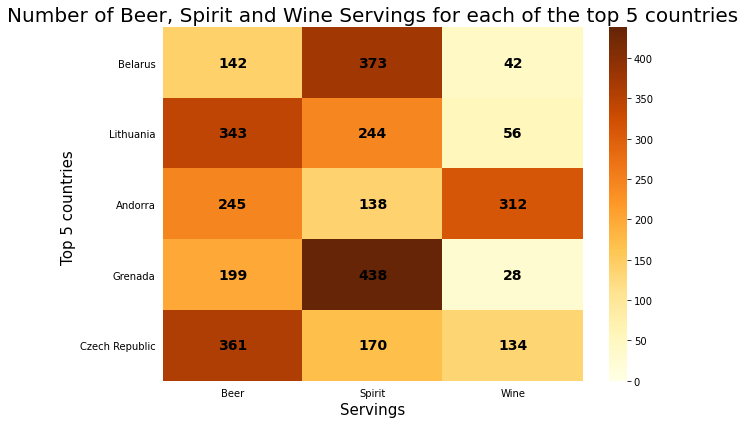

In [9]:
plt.figure(figsize=(10,6)) #figure size
sns.heatmap(values, #number of beer, spirit and wine servings for each country
            cmap='YlOrBr', #the color palette
            fmt='g',
            vmin=0,
            xticklabels=xlabels, #adding the xlabels (Beer, Spirit and Wine)
            yticklabels=ylabels, #adding the ylabels, (Each country name)
            annot=True,
            annot_kws={'fontsize':14, 'fontweight': 'bold', 'color': 'black'}
           )
plt.yticks(rotation=0)
plt.tick_params(
    which='both',      
    bottom=False,      
    left=False,      
    labelbottom=True, #makes the x labels appear at the bottom
    labeltop=False)
#Adding title and x and y labels
plt.title('Number of Beer, Spirit and Wine Servings for each of the top 5 countries', fontsize = 20)
plt.xlabel('Servings', fontsize = 15) 
plt.ylabel('Top 5 countries ', fontsize = 15)
plt.tight_layout();

### Plot a graph depicting the distribution of the “Total litres of pure alcohol” in the top five countries. 

See the difference in the amount of total litres of pure alcohol between the top 5 countries in the bar chart below:

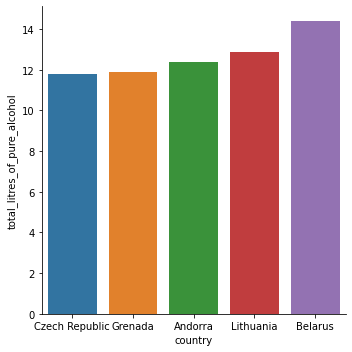

In [10]:
sns.catplot(x='country', y='total_litres_of_pure_alcohol', data=top_litres_alcohol.sort_values('total_litres_of_pure_alcohol'), kind='bar')

In this histogram plot below we can see that from the top 5 countries, most of them consumed between 11.8 and 12.4 litres and the others are distributed between 12.4 and 14.4 litres

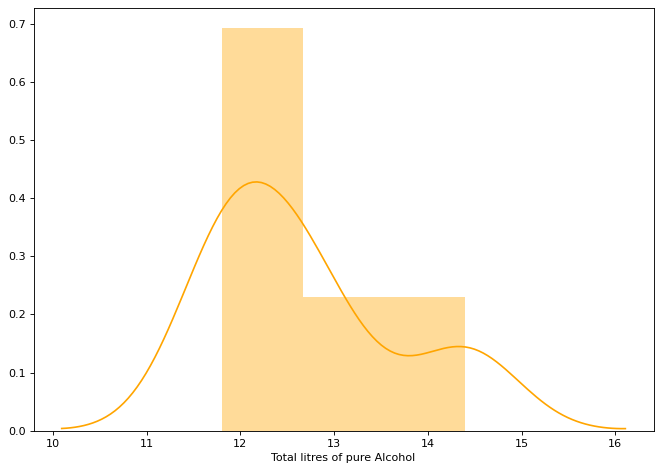

In [11]:
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(top_litres_alcohol.total_litres_of_pure_alcohol, color="orange", axlabel="Total litres of pure Alcohol")

Tweeking a little the histogram plot we can see each value better. From the top 5 countries, two of them consumed between 11.8 and 12 litres and the 3 others, 1 consumed 12.4, another consumed 12.9 and the last 14.4 litres

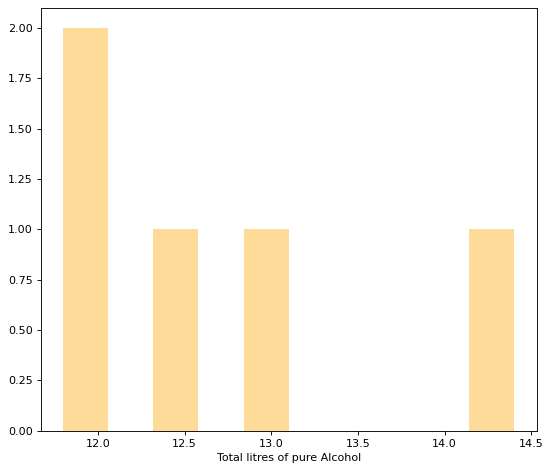

In [12]:
plt.figure(figsize=(8,7), dpi= 80)
sns.distplot(top_litres_alcohol.total_litres_of_pure_alcohol, color="orange", kde=False, bins=10, axlabel="Total litres of pure Alcohol")

Here a histogram was chosen because it is the most commonly used type of graph to show frequency distributions. It shows how often each different value in a set of data occurs. 

### Find out which continent consumed the largest “Total litres of pure alcohol” 

Groupby function groups a DataFrame using a mapper or by a Series of columns. It can be used to group large amounts of data and compute operations on these groups. The sum function returns the sum of the values for the requested axis. By using them together we can sum up the total_litres_of_pure_alcohol for every country in each continent and see which continent consumed more, and which consumed less.

In [13]:
total_by_continent = drinks_df.groupby('continent').total_litres_of_pure_alcohol.sum()

In [14]:
total_by_continent

continent
Africa           159.4
Asia              95.5
Europe           387.8
North America    137.9
Oceania           54.1
South America     75.7
Name: total_litres_of_pure_alcohol, dtype: float64

In [15]:
total_by_continent.max()

387.79999999999995

#### By now, we can already see that the largest one is Europe but let's see it in Pie Chart

#### Save the continent names and their corresponding total litres of alcohol in 2 different arrays to pass as arguments to the Pie Char

In [16]:
continents = total_by_continent.keys()
continents

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='continent')

In [17]:
data = total_by_continent.values
data

array([159.4,  95.5, 387.8, 137.9,  54.1,  75.7])

#### Create the Pie Chart showing Europe was the largest one with 387 litres and 42.6% of the total litres worldwide

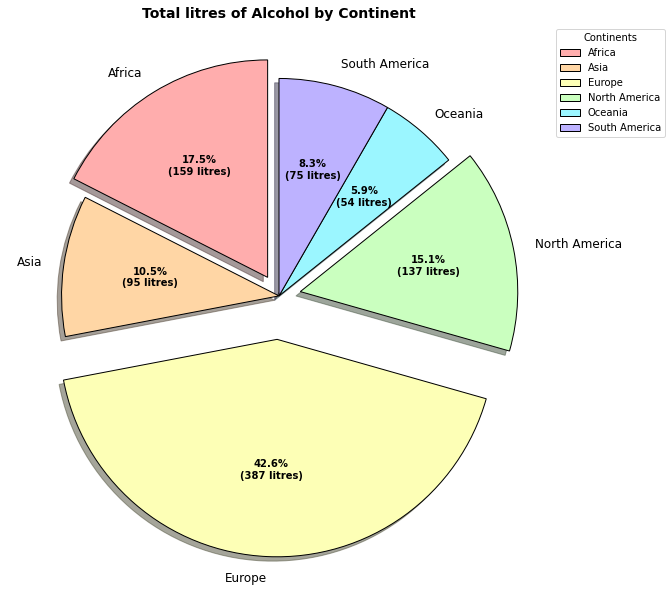

In [18]:
# Creating explode data, this is what makes each piece of the chart separate 
explode = (0.1, 0.0, 0.2, 0.1, 0.0, 0.0) 
  
# Creating color palette
colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#bdb2ff']
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} litres)".format(pct, absolute) 

# Creating plot 
fig, ax = plt.subplots(figsize =(15, 10)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = continents, 
                                  shadow = True, 
                                  colors = colors,
                                  startangle = 90, 
                                  wedgeprops = wp,
                                  textprops={'fontsize': 12}) 
  
# Adding legend 
ax.legend(wedges, continents, 
          title ="Continents", 
          loc ="upper left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 10, weight ="bold") 
ax.set_title("Total litres of Alcohol by Continent", size = 14, weight ="bold") 
  
# show plot 
plt.show() 


For this visualization I chose a pie chart, because they are generally used to show percentage or proportional data. Pie charts emphasize that the individual parts add up to a whole, and in this case, all the litres of alcohol consumed in the world. Also, pie charts are good for displaying data for around 6 categories or fewer. When there are more categories it is difficult for the eye to distinguish between the relative sizes of the different sectors and so the chart becomes difficult to interpret, but in this case we have only 6, and specially because Europe consumed so much more than the other 5, It's super easy to see that Europe was the one which consumed the largest amount.

### Observe the average beer and wine servings by continent 

#### Using the .mean() function of pandas DataFrame we can calculate the average of beer servings and then the average of wine servings, using the same groupby function used before to group by continent and rounding to the closest integer

In [19]:
avg_beer = drinks_df.groupby('continent').beer_servings.mean().round(0).astype(int)
avg_beer

continent
Africa            61
Asia              37
Europe           194
North America    145
Oceania           90
South America    175
Name: beer_servings, dtype: int64

In [20]:
avg_wine = drinks_df.groupby('continent').wine_servings.mean().round(0).astype(int)
avg_wine

continent
Africa            16
Asia               9
Europe           142
North America     25
Oceania           36
South America     62
Name: wine_servings, dtype: int64

#### Save the names of the continents and the averages in separate index/arrays to pass as arguments to the Grouped Bar Chart

In [21]:
labels = avg_beer.keys()
labels

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='continent')

In [22]:
beer_means = avg_beer.values
beer_means

array([ 61,  37, 194, 145,  90, 175])

In [23]:
wine_means = avg_wine.values
wine_means

array([ 16,   9, 142,  25,  36,  62])

#### Create a Grouped Bar Chart showing the average beer and wine servings by continent

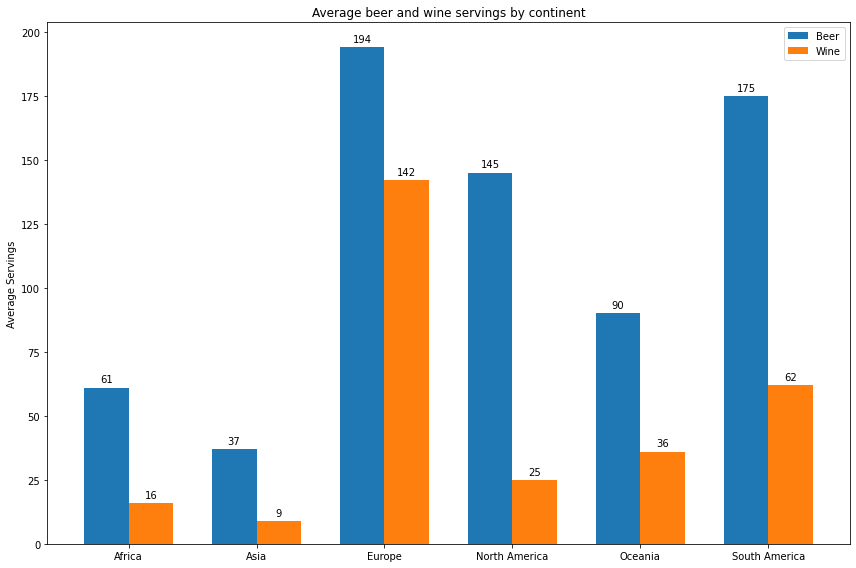

In [24]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
 
fig, ax = plt.subplots(figsize =(12, 8)) #the figure size
rects1 = ax.bar(x - width/2, beer_means, width, label='Beer') 
rects2 = ax.bar(x + width/2, wine_means, width, label='Wine')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Servings')
ax.set_title('Average beer and wine servings by continent')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

I chose a grouped bar chart for the last visualization because this type of chart is good for comparing elements across categories. Here we are using it to compare the beer and wine servings, and we want to show the average amount of servings for each continent, a group bar chart is a very good option, each separate bar represents one of the sub-groups (e.g. beer or wine) and they are coloured differently making it easy to distinguish between them. 

References:

Asq.org. (2020). What are Histograms? Analysis & Frequency Distribution | ASQ. [online] Available at: https://asq.org/quality-resources/histogram [Accessed 17 Nov. 2020].

GeeksforGeeks. (2020). Plot a pie chart in Python using Matplotlib - GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/ [Accessed 16 Nov. 2020].

GeeksforGeeks. (2018). Python | Pandas dataframe.keys() - GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/python-pandas-dataframe-keys/#:~:text=keys()%20function%20returns%20the,panel%20then%20it%20returns%20major_axis. [Accessed 16 Nov. 2020].

GeeksforGeeks. (2019). Python | Pandas DataFrame.values - GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/python-pandas-dataframe-values/ [Accessed 16 Nov. 2020].

GeeksforGeeks. (2018). Python | Pandas dataframe.sum() - GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/python-pandas-dataframe-sum/#:~:text=sum()%20function%20return%20the,the%20values%20in%20each%20column. [Accessed 16 Nov. 2020].

kimfetti (2020). kimfetti/Videos. [online] GitHub. Available at: https://github.com/kimfetti/Videos/blob/master/Seaborn/11_heatmap.ipynb [Accessed 16 Nov. 2020].

Matplotlib.org. (2012). Grouped bar chart with labels — Matplotlib 3.1.2 documentation. [online] Available at: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html [Accessed 17 Nov. 2020].

Pydata.org. (2012). seaborn.distplot — seaborn 0.11.0 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.distplot.html [Accessed 16 Nov. 2020].

Pydata.org. (2020). pandas.DataFrame.groupby — pandas 1.1.4 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html [Accessed 16 Nov. 2020].

shanelynn (2016). Using iloc, loc, & ix to select rows and columns in Pandas DataFrames. [online] Shane Lynn. Available at: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/#:~:text=iloc%20returns%20a%20Pandas%20Series,When%20using%20. [Accessed 16 Nov. 2020].

SSDS (2010). What data can be presented using a pie chart? [online] Le.ac.uk. Available at: https://www.le.ac.uk/oerresources/ssds/numeracyskills/page_53.htm#:~:text=Pie%20charts%20are%20generally%20used,around%206%20categories%20or%20fewer. [Accessed 27 Nov. 2020].

SSDS (2010). Different types of bar charts. [online] Le.ac.uk. Available at: https://www.le.ac.uk/oerresources/ssds/numeracyskills/page_47.htm [Accessed 27 Nov. 2020].
